# Trees
- It's all about splitting the data
- You CHOOSE the data with the best split

### Random Forests
A ranodm sample of features is chosen for EVERY tree at each split. 
Random trees wil de-correlate quantities


In [45]:
import pandas as pd
import numpy as np

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [47]:
df = pd.read_csv('kyphosis.csv')

In [48]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
Kyphosis    81 non-null object
Age         81 non-null int64
Number      81 non-null int64
Start       81 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.6+ KB


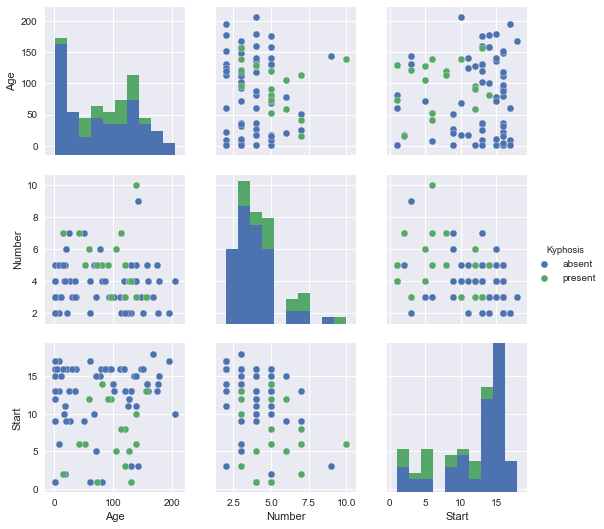

In [50]:
sns.pairplot(df, hue='Kyphosis')

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X = df.drop('Kyphosis', axis=1) #you got to drop what you lookign for!

In [53]:
y = df['Kyphosis']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [55]:
from sklearn.tree import DecisionTreeClassifier

In [56]:
dtree = DecisionTreeClassifier()

In [57]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [58]:
predictions = dtree.predict(X_test)

In [59]:
from sklearn.metrics import classification_report, confusion_matrix

In [60]:
print(confusion_matrix(y_test,predictions))

[[18  4]
 [ 1  2]]


In [61]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

     absent       0.95      0.82      0.88        22
    present       0.33      0.67      0.44         3

avg / total       0.87      0.80      0.83        25



In [62]:
from sklearn.ensemble import RandomForestClassifier
#This is an ensemble because its a bunch of decision trees with random splits

In [63]:
rfc = RandomForestClassifier(n_estimators=200)

In [64]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [65]:
rfc_pred = rfc.predict(X_test)

In [66]:
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

[[20  2]
 [ 1  2]]
             precision    recall  f1-score   support

     absent       0.95      0.91      0.93        22
    present       0.50      0.67      0.57         3

avg / total       0.90      0.88      0.89        25

